In [81]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



<h3>K-Nearest Neighbours</h3>

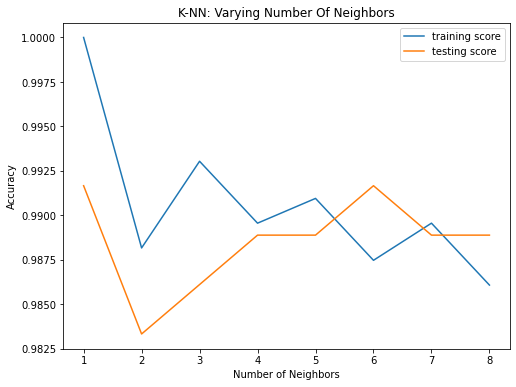

In [82]:
digits=datasets.load_digits()
X= digits.data
Y= digits.target
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
train_score=[]
test_score=[]
for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_score.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))
knnscore=knn.score(X_train,Y_train)
#plot
plt.figure(figsize=(8,6))
plt.plot(range(1,9), train_score, label= "training score")
plt.plot(range(1,9), test_score, label= "testing score")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.title('K-NN: Varying Number Of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend();


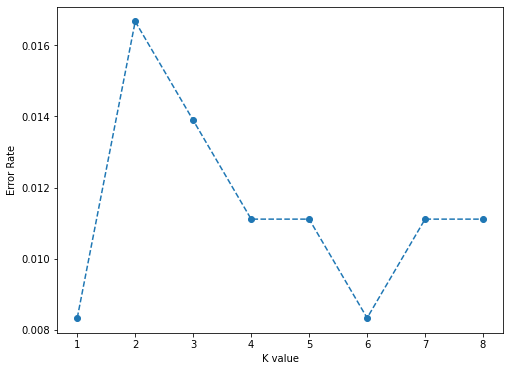

In [83]:
#Finding the best value for K
error = []
for i in range(1,9):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred = knn.predict(X_test)
 error.append(np.mean(pred != Y_test))

plt.figure(figsize=(8,6))
plt.plot(range(1,9),error, linestyle='dashed', marker='o')
plt.xlabel('K value')
plt.ylabel('Error Rate');


<h5>The best value for Number of Neighbours is 3 from above graphs</h5>

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knnscore=knn.score(X_train,Y_train)

<h3>SVM</h3>

In [29]:
svc = SVC(kernel="linear")
svc.fit(X_train,Y_train)
pred=svc.predict(X_test)
svmscore = svc.score(X_train,Y_train)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.98        41
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        39
           5       1.00      0.98      0.99        45
           6       1.00      0.97      0.99        34
           7       1.00      1.00      1.00        32
           8       0.97      0.97      0.97        33
           9       0.97      0.97      0.97        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [31]:
#poly kernel
svc= SVC(kernel='poly')
svc.fit(X_train,Y_train)
pred = svc.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.93      1.00      0.96        41
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        39
           5       1.00      0.96      0.98        45
           6       1.00      0.97      0.99        34
           7       1.00      1.00      1.00        32
           8       0.97      0.94      0.95        33
           9       0.94      0.97      0.96        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [32]:
#rbf kernel
svc= SVC(kernel='rbf')
svc.fit(X_train,Y_train)
pred = svc.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        38
           3       0.97      1.00      0.99        35
           4       1.00      1.00      1.00        39
           5       1.00      0.98      0.99        45
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        32
           8       1.00      0.97      0.98        33
           9       0.97      0.97      0.97        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



From the above analysis linear kernel should be used for SVM

<h3>Naive Bayes</h3>

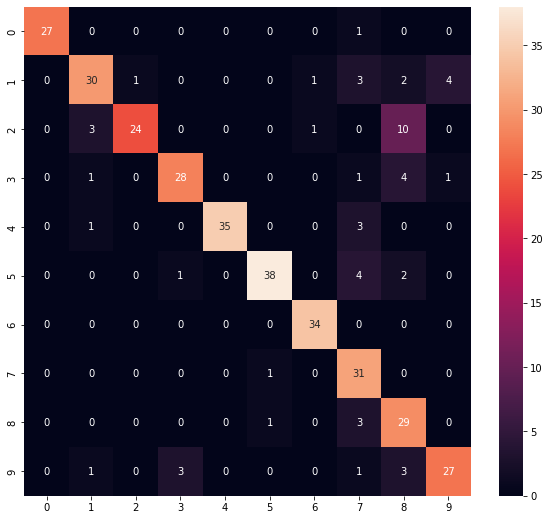

In [34]:
bayes= GaussianNB()
bayes.fit(X_train,Y_train)
y_pred= bayes.predict(X_test)
accuracy_matrix= confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10,9))
sns.heatmap(accuracy_matrix, annot=True)
plt.show()
bayesscore=bayes.score(X_train,Y_train)

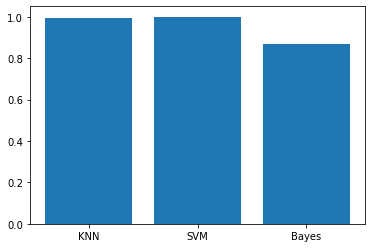

[0.9937369519832986, 1.0, 0.8705636743215032]


In [37]:
#plotting accuracy of knn, svm, bayes 
data=[knnscore, svmscore, bayesscore]
x = np.arange(3)
fig, ax = plt.subplots()
plt.bar(x, data)
plt.xticks(x, ('KNN', 'SVM', 'Bayes'))
plt.show()
print(data)

From the above analysis SVM classifier best fits the data

<h3>Linear Regression</h3>

In [38]:
df = pd.read_csv('gapminder.csv')

In [39]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


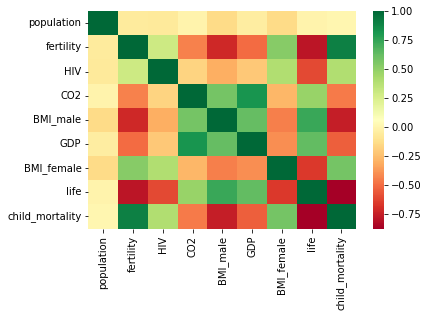

In [41]:
sns.heatmap(df.corr(),cmap="RdYlGn");

0.6192442167740035


/var/folders/n7/mxvwd0jj5nv2jlky3hbjxff80000gn/T/ipykernel_17220/3409632666.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:,None],y);
/var/folders/n7/mxvwd0jj5nv2jlky3hbjxff80000gn/T/ipykernel_17220/3409632666.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:,None],y))
/var/folders/n7/mxvwd0jj5nv2jlky3hbjxff80000gn/T/ipykernel_17220/3409632666.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax= plt.plot(x,y, 'bo', x,regression.predict(x[:,None]), '-k');


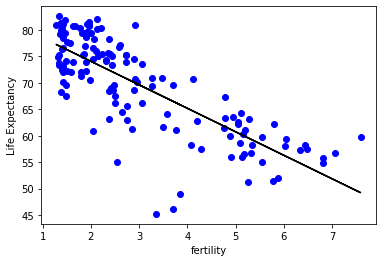

In [47]:

regression =LinearRegression()
x = df["fertility"]
y= df["life"]
regression.fit(x[:,None],y);
print(regression.score(x[:,None],y))
fig, ax= plt.plot(x,y, 'bo', x,regression.predict(x[:,None]), '-k');
plt.xlabel('fertility')
plt.ylabel('Life Expectancy');



In [51]:
#cross validation score with only one attribute(fertility)
print(cross_val_score(regression,x[:,None],y,cv=5));

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


/var/folders/n7/mxvwd0jj5nv2jlky3hbjxff80000gn/T/ipykernel_17220/3223212317.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(cross_val_score(regression,x[:,None],y,cv=5));


In [64]:
#using all attributes for prediction
x=df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y=df["life"]
regression= LinearRegression()
regression.fit(x,y)




LinearRegression()

In [63]:
#cross validation for regression with all features
cross_val_score(regression,x,y,cv=5)

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

<h3>Logistic Regression</h3>

In [65]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


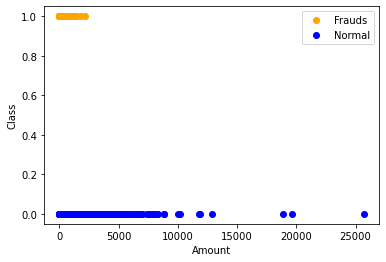

In [67]:
frauds=df.loc[df['Class']==1]
non_frauds= df.loc[df['Class']==0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label='Frauds')
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color="blue", label='Normal')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()

/Users/anjugahlot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/n7/mxvwd0jj5nv2jlky3hbjxff80000gn/T/ipykernel_17220/3308058903.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(Xlabel="Predicted value",


[Text(0.5, 15.0, 'Predicted value'), Text(33.0, 0.5, 'True value')]

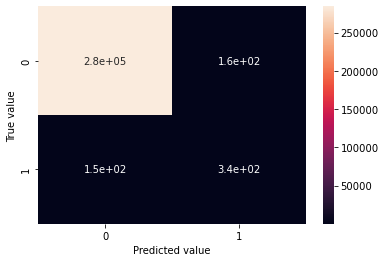

In [80]:
X = df.drop("Class", axis=1)
Y = df['Class']
log_regression = LogisticRegression()
log_regression.fit(X, Y)
y_pred = log_regression.predict(X)
accuracy_matrix = confusion_matrix(Y, y_pred)
ax = sns.heatmap(accuracy_matrix, annot=True)
ax.set(Xlabel="Predicted value",
       ylabel="True value")